# Run Functions

In [1]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 453762


# TOR (A) 93-94

Phillies @ TOR historically

In [3]:
df = potor = pos[pos.home_team == 'TOR']
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Sosa, Edmundo'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          ,'Wilson, Weston'
          ,'Clemens, Kody'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
26,"Marsh, Brandon",30,9,5,4.0,0.0,3.0,0.0,0.800,0.889,1.000,1.889,0.743
10,"Clemens, Kody",32,6,6,2.0,1.0,0.0,0.0,0.333,0.333,1.000,1.333,0.550
17,"Harper, Bryce",139,36,21,9.0,4.0,7.0,7.0,0.321,0.472,0.786,1.258,0.509
42,"Schwarber, Kyle",110,27,14,7.0,4.0,2.0,11.0,0.292,0.333,0.833,1.167,0.466
45,"Stott, Bryson",106,25,20,7.0,2.0,1.0,4.0,0.292,0.320,0.667,0.987,0.414
44,"Sosa, Edmundo",45,10,6,3.0,0.0,1.0,3.0,0.375,0.400,0.375,0.775,0.334
47,"Turner, Trea",65,18,15,4.0,0.0,2.0,1.0,0.250,0.333,0.312,0.646,0.294
35,"Realmuto, J.T.",111,28,16,5.0,1.0,2.0,10.0,0.192,0.250,0.346,0.596,0.261
8,"Castellanos, Nick",79,25,14,5.0,0.0,0.0,10.0,0.208,0.240,0.333,0.573,0.249
51,"Wilson, Weston",32,6,3,1.0,0.0,1.0,2.0,0.200,0.333,0.200,0.533,0.262


In [4]:
nptor = nphl[(nphl.player_name.isin(lineup))
     &(nphl.home_team == 'TOR')
    ]
df = pd.concat([potor,nptor])
res = results('player_name')
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
26,"Marsh, Brandon",30,9,5,4.0,0.0,3.0,0.0,0.800,0.889,1.000,1.889,0.743
42,"Schwarber, Kyle",143,36,18,8.0,4.0,3.0,14.0,0.258,0.333,0.710,1.043,0.424
45,"Stott, Bryson",106,25,20,7.0,2.0,1.0,4.0,0.292,0.320,0.667,0.987,0.414
17,"Harper, Bryce",190,49,27,10.0,4.0,8.0,13.0,0.250,0.388,0.575,0.963,0.406
10,"Clemens, Kody",44,10,8,2.0,1.0,0.0,2.0,0.222,0.200,0.667,0.867,0.330
47,"Turner, Trea",205,52,39,14.0,2.0,3.0,9.0,0.298,0.346,0.489,0.836,0.355
8,"Castellanos, Nick",319,100,66,27.0,4.0,3.0,30.0,0.281,0.310,0.500,0.810,0.343
44,"Sosa, Edmundo",45,10,6,3.0,0.0,1.0,3.0,0.375,0.400,0.375,0.775,0.334
35,"Realmuto, J.T.",145,36,24,9.0,1.0,2.0,10.0,0.265,0.306,0.382,0.688,0.301
51,"Wilson, Weston",32,6,3,1.0,0.0,1.0,2.0,0.200,0.333,0.200,0.533,0.262


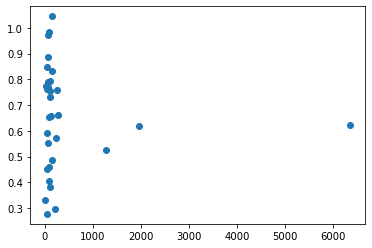

In [5]:
pp24 = pps[pps.game_year==2024]
pp24.groupby(['player_name','pitcher','p_throws']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by=['p_throws','des'])
alvarado_id = 621237
ja = pd.concat([pps[pps.pitcher == alvarado_id]
                ,nphl[nphl.player_name == 'Alvarado, José']
               ])
df = ja
avg = results('player_name')
ht = results('home_team')
z = pd.concat([avg,ht]).sort_values(by='pitches',ascending=False)
x = z.pitches
y = z.ops
plt.scatter(x,y)

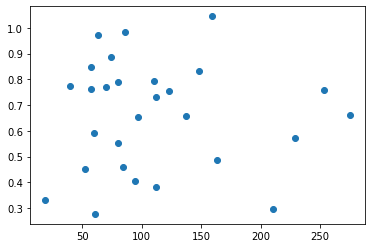

In [6]:
z = ht[~ht.home_team.isin(['TB','PHI'])]
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [7]:
po24 = pos[pos.game_year == 2024]

In [8]:
x = po24.groupby(['game_pk','inning','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'post_home_score' : ['min','max']
                   ,'post_away_score' : ['min','max']
                  })
x['home_diff'] = x['post_home_score']['max'] - x['post_home_score']['min']
x['away_diff'] = x['post_away_score']['max'] - x['post_away_score']['min']

In [9]:
df = x[['home_diff','away_diff','game_date','inning','home_team','away_team']]
df.sort_values(by='home_diff',ascending=False) # The biggest inning for a home Phillies game was when they bopped the Guards.

,home_diff,away_diff,game_date,inning,home_team,away_team
,,,,,,
450,7,0,2024-07-27,4,PHI,CLE
483,6,0,2024-07-09,4,PHI,LAD
835,5,0,2024-04-02,7,PHI,CIN
731,5,0,2024-05-07,4,PHI,TOR
292,5,0,2024-09-10,8,PHI,TB
...,...,...,...,...,...,...
497,0,0,2024-06-29,2,PHI,MIA
496,0,0,2024-06-29,1,PHI,MIA
494,0,0,2024-07-11,7,PHI,LAD


In [10]:
df.sort_values(by='away_diff',ascending=False).head(10)
# The Phillies did their most bopping to the Mets on June 8th (in London?)

,home_diff,away_diff,game_date,inning,home_team,away_team
,,,,,,
920,0,6,2024-09-20,4,NYM,PHI
1188,0,6,2024-05-25,9,COL,PHI
929,0,6,2024-06-08,4,NYM,PHI
1133,0,5,2024-08-25,8,KC,PHI
1151,0,5,2024-08-24,8,KC,PHI
89,0,5,2024-08-04,8,SEA,PHI
1077,0,5,2024-08-07,6,LAD,PHI
104,0,4,2024-08-03,5,SEA,PHI
1009,0,4,2024-09-06,2,MIA,PHI


In [11]:
df['runs'] = df['home_diff'] + df['away_diff']
#df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [12]:
mins = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'min'
                                                       ,'post_away_score' : 'min'
                                                      })

maxs = po24.groupby(['inning','game_pk','home_team','away_team'],as_index=False).agg({'post_home_score' : 'max'
                                                       ,'post_away_score' : 'max'
                                                      })

In [13]:
amins = mins[mins.away_team == 'PHI']
hmins = mins[mins.home_team == 'PHI']
amaxs = maxs[maxs.away_team == 'PHI']
hmaxs = maxs[maxs.home_team == 'PHI']

In [14]:
a = amins.merge(amaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
a['runs'] = a.post_away_score_max - a.post_away_score_min
a

,inning,game_pk,home_team,away_team,post_home_score_min,post_away_score_min,post_home_score_max,post_away_score_max,runs
0,1,744797,WSH,PHI,0,0,0,0,0
1,1,744871,WSH,PHI,0,0,0,0,0
2,1,744873,WSH,PHI,0,0,0,0,0
3,1,744874,WSH,PHI,0,0,0,0,0
4,1,744887,TOR,PHI,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
715,10,746068,MIA,PHI,6,6,6,6,0
716,10,746558,COL,PHI,2,2,2,2,0
717,10,747025,BAL,PHI,2,2,2,3,1
718,11,746558,COL,PHI,2,2,2,2,0


In [15]:
a.groupby('inning',as_index=False).agg({'runs' : 'sum'})

,inning,runs
0,1,46
1,2,31
2,3,32
3,4,40
4,5,40
5,6,55
6,7,31
7,8,39
8,9,41
9,10,4


In [16]:
h = hmins.merge(hmaxs, on = ['inning','game_pk','home_team','away_team']
                ,suffixes = ('_min', '_max')
               )
h['runs'] = h.post_home_score_max - h.post_home_score_min
h.sort_values(by='runs',ascending=False)

,inning,game_pk,home_team,away_team,post_home_score_min,post_away_score_min,post_home_score_max,post_away_score_max,runs
272,4,745553,PHI,CLE,0,0,7,0,7
276,4,745557,PHI,LAD,3,0,9,0,6
59,1,745583,PHI,SF,0,0,5,0,5
578,8,745535,PHI,TB,4,4,9,4,5
305,4,745586,PHI,TOR,3,0,8,0,5
...,...,...,...,...,...,...,...,...,...
267,4,745548,PHI,MIA,0,3,0,3,0
265,4,745546,PHI,NYY,4,1,4,1,0
261,4,745542,PHI,WSH,2,0,2,0,0
260,4,745541,PHI,HOU,0,6,0,6,0


In [17]:
df = pd.concat([h,a])
z = df.groupby('inning',as_index=False).agg({'runs' : 'sum'})

In [18]:
x = po24.groupby('inning',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                          })

In [19]:
y = x.merge(z, on = 'inning')
y['r/p'] = y.runs/y.des
y.sort_values(by='r/p',ascending=False).round(3)

,inning,des,game_pk,runs,r/p
10,11,73,5,5,0.068
5,6,2626,160,109,0.042
9,10,205,16,8,0.039
3,4,2656,160,99,0.037
0,1,2834,160,101,0.036
4,5,2571,160,82,0.032
8,9,1832,116,56,0.031
2,3,2645,160,80,0.030
6,7,2695,160,80,0.030
7,8,2590,160,75,0.029


In [20]:
# Try feeding sketches on paper into ChatGPT and have it write a function in Python that builds the sketch using matplotlib

## Game 1: Bassitt vs Phillips

Crazy comeback win, Schwarber hits three home runs.

In [21]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
ks_hrs = ks[ks.events == 'home_run']
df = ks_hrs.groupby('game_pk',as_index=False).agg({'des' : 'count'})

In [22]:
x = df[df.des>2]

In [23]:
y = ks.groupby(['game_pk','game_date','home_team','away_team'],as_index=False).agg({'at_bat_number' : 'nunique'
                                                                                    ,'launch_speed' : 'mean'
                                                                                    ,'launch_angle' : 'mean'
                                                                                    ,'hit_distance_sc' : 'sum'
                                                                                   })
z = x.merge(y,on = 'game_pk')
z

,game_pk,des,game_date,home_team,away_team,at_bat_number,launch_speed,launch_angle,hit_distance_sc
0,633557,3,2021-06-20,WSH,NYM,4,95.714286,19.142857,1622.0
1,744891,3,2024-09-03,TOR,PHI,6,94.516667,41.000000,3025.0
2,746115,3,2024-08-07,LAD,PHI,5,102.500000,29.800000,1473.0


## Game 2: Francis vs Sanchez

In [24]:
# Kody Clemens hit one of the softest home runs of the year?
hrs = po24[po24.events == 'home_run']
hrs.agg({'launch_speed' : ['min'
                                                       ,'max'
                                                       ,'mean'
                                                       ,'std'
                                                      ]}).round(2)

,launch_speed
min,92.70
max,114.90
mean,104.25
std,4.47


(array([ 3.,  8., 16., 24., 36., 39., 32., 26.,  5.,  8.]),
 array([ 92.7 ,  94.92,  97.14,  99.36, 101.58, 103.8 , 106.02, 108.24,
        110.46, 112.68, 114.9 ]),
 <BarContainer object of 10 artists>)

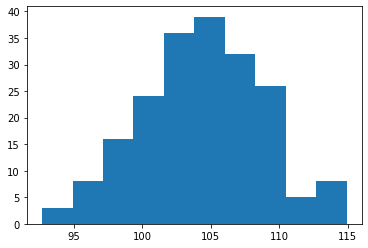

In [25]:
plt.hist(hrs.launch_speed)

# MIA (A) 95-98

In [26]:
# Phillies play well in Miami, at least these turkeys do.

In [27]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
          ,'Hays, Austin'
         ]
mia = pd.concat([pos[(pos.home_team=='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team=='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = mia
miares = results('player_name')

In [28]:
oth = pd.concat([pos[(pos.home_team!='MIA')
                     &(pos.player_name.isin(lineup))
                    ]
                 ,nphl[(nphl.home_team!='MIA')
                       &(nphl.player_name.isin(lineup))
                      ]
                ])
df = oth
othres = results('player_name')

In [29]:
miares

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",451,119,92,35,1.0,7,20,0.318,0.353,0.436,0.789,0.340
1,"Castellanos, Nick",400,107,69,24,4.0,7,29,0.247,0.308,0.402,0.710,0.310
2,"Harper, Bryce",1271,308,188,70,13.0,38,78,0.270,0.357,0.498,0.855,0.362
3,"Hays, Austin",67,20,14,5,0.0,1,3,0.294,0.400,0.294,0.694,0.327
4,"Marsh, Brandon",225,54,36,15,1.0,3,14,0.300,0.333,0.460,0.793,0.338
5,"Realmuto, J.T.",4467,1155,859,271,28.0,65,219,0.254,0.300,0.401,0.700,0.302
6,"Schwarber, Kyle",579,134,78,26,9.0,12,43,0.215,0.284,0.479,0.763,0.325
7,"Stott, Bryson",340,91,71,24,1.0,6,13,0.293,0.341,0.427,0.767,0.332
8,"Turner, Trea",841,226,170,48,9.0,16,36,0.233,0.296,0.403,0.699,0.302


In [30]:
othres

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",8934,2435,1810,608,60,158,441,0.273,0.324,0.413,0.737,0.320
1,"Castellanos, Nick",21530,5774,4026,1462,223,345,1347,0.274,0.321,0.477,0.798,0.339
2,"Harper, Bryce",21725,5369,3380,1285,280,743,1171,0.285,0.385,0.542,0.927,0.392
3,"Hays, Austin",8002,2196,1565,528,68,125,475,0.261,0.311,0.433,0.744,0.320
4,"Marsh, Brandon",6967,1695,958,385,43,158,565,0.256,0.327,0.412,0.739,0.322
5,"Realmuto, J.T.",15116,3913,2733,985,146,251,855,0.276,0.332,0.469,0.801,0.343
6,"Schwarber, Kyle",20198,4738,2701,930,295,638,1349,0.231,0.340,0.494,0.834,0.356
7,"Stott, Bryson",6925,1683,1243,380,36,129,294,0.249,0.308,0.372,0.680,0.298
8,"Turner, Trea",19338,4984,3670,1362,167,328,941,0.296,0.346,0.479,0.825,0.353


## Game 1: Oller vs Suarez

In [31]:
#Bryce Harper launch_speed vs batting average

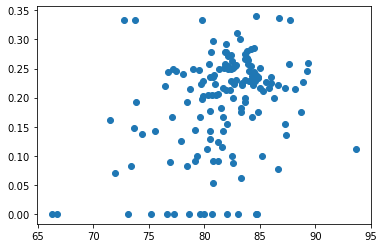

In [32]:
df = pos
res = results('player_name')
lvs = df.groupby('player_name',as_index=False).agg({'launch_speed' : 'mean'})
z = lvs.merge(res, on = 'player_name')
za = z[(z.launch_speed >= z.launch_speed.mean() - 2*(z.launch_speed.std()))
      &(z.ba >= z.ba.mean() - 2*(z.ba.std()))
     ]
x = za.launch_speed
y = za.ba
plt.scatter(x,y)

In [33]:
2*z.pitches.std()

5246.274318356627

In [34]:
(z.pitches.mean() - z.pitches.std())

-1323.0971591783136

In [35]:
z[z.pitches >= z.pitches.mean()].sort_values(by='ops', ascending=False).head(15)

,player_name,launch_speed,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
69,"Harper, Bryce",84.485381,12708,3188,2036.0,781.0,163.0,405.0,721.0,0.286,0.380,0.540,0.920,0.390
146,"Schwarber, Kyle",86.680942,9328,2188,1200.0,406.0,142.0,323.0,644.0,0.222,0.341,0.495,0.836,0.359
77,"Hoskins, Rhys",84.623153,12994,2949,1802.0,599.0,154.0,383.0,713.0,0.239,0.346,0.488,0.835,0.357
107,"Miller, Brad",84.803287,2031,506,302.0,106.0,32.0,54.0,147.0,0.236,0.320,0.493,0.813,0.344
160,"Turner, Trea",83.865144,4900,1281,934.0,333.0,49.0,75.0,254.0,0.280,0.328,0.466,0.794,0.342
100,"Marsh, Brandon",83.708696,4851,1167,666.0,274.0,34.0,120.0,371.0,0.267,0.344,0.444,0.787,0.341
102,"McCutchen, Andrew",84.274979,4447,1075,691.0,218.0,47.0,144.0,235.0,0.237,0.341,0.444,0.786,0.339
134,"Realmuto, J.T.",83.962089,11505,2952,1998.0,708.0,115.0,202.0,694.0,0.264,0.325,0.460,0.785,0.336
144,"Santana, Carlos",84.594865,2801,675,475.0,128.0,24.0,104.0,93.0,0.228,0.345,0.413,0.758,0.332
85,"Joseph, Tommy",84.069819,3348,881,615.0,200.0,43.0,54.0,204.0,0.246,0.295,0.459,0.754,0.319


In [36]:
# ranger suarez running average velo in this start

In [37]:
pp24.groupby(['p_throws','pitcher','player_name'],as_index=False).agg({'des' : 'count'})
ranger_id = 624133
df = pp24[(pp24.pitcher == ranger_id)
     &(pp24.game_date == pp24.game_date.max())
    ]
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
203076,CU,2024-09-27,74.4,1.67,5.96,"Suárez, Ranger",671277,624133,strikeout,swinging_strike,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203077,FF,2024-09-27,92.6,2.01,5.81,"Suárez, Ranger",671277,624133,NaN,ball,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203078,CU,2024-09-27,72.6,1.67,5.90,"Suárez, Ranger",671277,624133,NaN,foul,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203079,SI,2024-09-27,91.7,1.83,5.86,"Suárez, Ranger",671277,624133,NaN,foul,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203080,FF,2024-09-27,90.9,1.85,5.87,"Suárez, Ranger",656448,624133,force_out,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203081,CH,2024-09-27,80.4,1.82,5.74,"Suárez, Ranger",656448,624133,NaN,blocked_ball,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203082,FF,2024-09-27,90.5,1.74,5.95,"Suárez, Ranger",656448,624133,NaN,ball,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203083,CH,2024-09-27,77.0,1.93,5.79,"Suárez, Ranger",660688,624133,single,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203084,CU,2024-09-27,72.9,1.66,5.95,"Suárez, Ranger",660688,624133,NaN,called_strike,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
203085,FC,2024-09-27,83.5,2.00,5.92,"Suárez, Ranger",660766,624133,sac_bunt,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166


In [38]:
df.groupby('pitch_type',as_index=False).agg({'release_speed' : 'mean'})

,pitch_type,release_speed
0,CH,78.970000
1,CU,73.175000
2,FC,85.160000
3,FF,91.035714
4,SI,90.216667


In [39]:
fb = df[df.pitch_type.isin(['FF','SI'])]
fbs = fb.reset_index().reset_index()

In [40]:
fbs['mu'] = fbs.release_speed.expanding().mean()

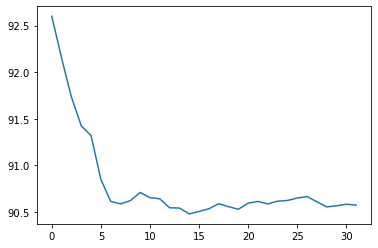

In [41]:
x = fbs.level_0.values
y = fbs.mu.values
plt.plot(x,y)

In [42]:
df.groupby(['inning','pitch_type'],as_index=False).agg({'release_speed' : 'mean'
                                                       ,'des' : 'count'}).sort_values(by=['inning','pitch_type'])

,inning,pitch_type,release_speed,des
0,1,CH,79.037500,8
1,1,CU,73.125000,8
2,1,FC,87.900000,1
3,1,FF,90.954545,11
4,1,SI,90.257143,14
5,2,CH,78.700000,2
6,2,CU,73.275000,4
7,2,FC,84.475000,4
8,2,FF,91.333333,3
9,2,SI,90.075000,4


## Game 2: Cabrera vs Wheeler

In [43]:
# wheeler third time thru
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zw.groupby(['game_pk','batter','at_bat_number']
            ,as_index=False)#.sort_values(by=['game_pk','batter','at_bat_number']).reset_index()


In [44]:
zw['rk'] = zw.sort_values(by=['game_pk','batter','at_bat_number']) \
.groupby(['game_pk','batter','at_bat_number']) \
.cumcount()+1

In [45]:
whit = pd.read_csv('whit_np.csv')
whit.groupby('batter',as_index=False).agg({'des' : 'count'})

,batter,des
0,593160,16988


In [46]:
zw[(zw.game_date==zw.game_date.max())
   &(zw.batter == 593160)].sort_values(by=['game_date','batter','at_bat_number'])[['game_date','inning','batter','at_bat_number','rk','pitch_number']].tail(24)

,game_date,inning,batter,at_bat_number,rk,pitch_number


In [47]:
df = risp = po24[(po24.on_2b.notna()) | (df.on_3b.notna())]
res_risp = results('player_name')

In [48]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2024,4573,1260,853,293,40,107,284,0.264,0.329,0.425,0.754,0.327


In [49]:
res_risp.sort_values(by='ba',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
7,"Kennedy, Buddy",13,3,2,2.0,0.0,1.0,0.0,1.000,1.000,1.500,2.500,0.942
16,"Stevenson, Cal",25,6,5,3.0,0.0,0.0,1.0,0.500,0.500,0.833,1.333,0.565
5,"Harper, Bryce",406,115,78,33.0,10.0,15.0,22.0,0.333,0.417,0.687,1.104,0.461
13,"Rojas, Johan",329,90,70,26.0,1.0,4.0,14.0,0.325,0.356,0.412,0.768,0.331
0,"Bohm, Alec",461,138,108,39.0,7.0,9.0,15.0,0.322,0.391,0.595,0.986,0.417
14,"Schwarber, Kyle",470,118,66,30.0,7.0,17.0,34.0,0.306,0.407,0.541,0.948,0.405
8,"Marchán, Rafael",34,9,6,2.0,0.0,1.0,2.0,0.286,0.333,0.286,0.619,0.273
19,"Turner, Trea",325,90,69,23.0,1.0,5.0,15.0,0.274,0.322,0.345,0.667,0.297
1,"Castellanos, Nick",424,128,95,31.0,3.0,11.0,21.0,0.270,0.336,0.426,0.762,0.332
9,"Marsh, Brandon",480,124,62,28.0,4.0,16.0,45.0,0.269,0.363,0.433,0.796,0.346


In [50]:
jt = pos[pos.player_name == 'Realmuto, J.T.']
jt_risp = jt[(jt.on_2b.notna()) | (jt.on_3b.notna())]

In [51]:
df = jt_risp[(jt_risp.balls == 3) & (jt_risp.strikes == 0)]
df.groupby('events',as_index=False).agg({'des' : 'count'})

,events,des
0,field_out,4
1,home_run,1
2,walk,18


In [52]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2019,4,3,0.0,0.0,0.0,3,0.0,NaN,1.000,NaN,NaN,0.690
1,2020,5,3,1.0,0.0,0.0,2,0.0,0.0,0.667,0.0,0.667,0.466
2,2021,9,4,1.0,0.0,0.0,3,0.0,0.0,0.750,0.0,0.750,0.519
3,2022,9,3,0.0,0.0,0.0,3,0.0,NaN,1.000,NaN,NaN,0.689
4,2023,8,4,1.0,0.0,0.0,3,0.0,0.0,0.750,0.0,0.750,0.522
5,2024,8,6,2.0,1.0,1.0,4,0.0,0.5,0.833,2.0,2.833,0.801


In [53]:
df = po24[po24.strikes == 2]
results('player_name').sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
7,"Kennedy, Buddy",17,6,3,1.0,0.0,1.0,2,0.200,0.333,0.400,0.733,0.324
5,"Harper, Bryce",731,315,146,58.0,14.0,33.0,135,0.207,0.292,0.414,0.706,0.308
0,"Bohm, Alec",546,245,140,50.0,4.0,18.0,85,0.224,0.282,0.350,0.631,0.277
19,"Turner, Trea",616,279,165,56.0,5.0,17.0,96,0.215,0.265,0.291,0.556,0.249
17,"Stott, Bryson",687,313,194,55.0,3.0,26.0,92,0.195,0.262,0.262,0.524,0.237
8,"Marchán, Rafael",49,24,14,4.0,0.0,2.0,8,0.182,0.250,0.273,0.523,0.235
16,"Stevenson, Cal",29,14,9,2.0,0.0,1.0,4,0.154,0.214,0.308,0.522,0.228
14,"Schwarber, Kyle",818,384,134,48.0,10.0,53.0,195,0.147,0.268,0.252,0.520,0.243
3,"Dahl, David",103,42,18,5.0,2.0,3.0,21,0.128,0.190,0.308,0.498,0.219
20,"Wilson, Weston",110,50,20,8.0,1.0,3.0,27,0.170,0.220,0.277,0.497,0.221


Have the Phillies been seeing more breaking balls recently?

In [54]:
po24.groupby(['pitch_type','pitch_name'],as_index=False).agg({'des' : 'count'
                                                              ,'release_speed' : 'mean'
                                                              ,'release_spin_rate' : 'mean'
                                                              ,'launch_speed' : 'mean'
                                                              ,'hit_distance_sc' : 'mean'
                                                              ,'launch_angle' : 'mean'
                                                             }).round(2).sort_values(by='des',ascending=False)

,pitch_type,pitch_name,des,release_speed,release_spin_rate,launch_speed,hit_distance_sc,launch_angle
6,FF,4-Seam Fastball,7221,94.34,2292.29,84.16,190.89,29.16
14,SL,Slider,4000,85.53,2417.89,81.20,133.81,10.22
13,SI,Sinker,3779,92.99,2157.77,84.64,143.49,10.87
0,CH,Changeup,2275,85.59,1780.36,79.57,114.44,4.04
2,CU,Curveball,1801,79.56,2563.68,80.85,131.44,6.28
5,FC,Cutter,1697,89.46,2380.38,83.89,162.56,17.99
15,ST,Sweeper,1572,81.67,2564.45,80.10,154.83,19.18
8,FS,Split-Finger,665,86.27,1212.65,79.44,103.01,0.34
9,KC,Knuckle Curve,204,82.02,2300.66,80.72,97.90,5.43
16,SV,Slurve,129,81.87,2378.41,80.64,154.29,16.55


In [55]:
breaking_balls = ['SL','CU','ST','KC','SV']
df = pos.groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'pitches'})
bb = pos[pos.pitch_type.isin(breaking_balls)].groupby(['game_pk','game_date'],as_index=False).agg({'des' : 'count'})

z = bb.merge(df, on = ['game_pk','game_date'], suffixes = ('','_total'))

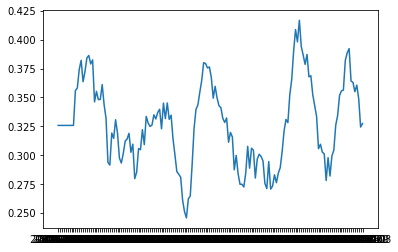

In [56]:
# This will calculate the 10 day moving average share of breaking balls seen by Phillies batters. It is actually on the way down
z['share'] = z.des/z.pitches
g = z[z.game_date >= '2024-03-01']
g['moving_share'] = g.share.rolling(10).mean()
g.fillna(g.share.mean(),inplace=True)
x = g.game_date.values
y = g.moving_share.values
plt.plot(x,y)
plt.show()

## Game 3: McCaughan vs Nola

## Game 4: Meyer vs Johnson
Seth Johnson is not ready for the big leagues.

# TBR (H) 99-911
## Game 1: Alexander vs Sanchez
Sanchez shoves, again. Kody Clemens walk off after Rojas drops a robbed home run over the wall.

## Game 2: Bradley vs Suarez

### Top 1

In [57]:
# what is a good number of swing and misses to get?
# Going to try and answer this in Top 2

In [58]:
rs = pps[pps.pitcher == ranger_id]
rs.groupby('fielder_2',as_index=False).agg({'des' : 'count'})
df = rs
rs2 = results('fielder_2').sort_values(by='pitches',ascending=False)
catchers = pos[pos.batter.isin(rs2.fielder_2)].groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
rs2.merge(catchers,left_on = 'fielder_2',right_on = 'batter')
# Ranger does not throw the ball that well to Garrett Stubbs.

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,player_name,batter,des
0,592663,7382,1917,1309,391,40.0,155.0,435,0.225,0.291,0.345,0.636,0.281,"Realmuto, J.T.",592663,11505
1,596117,1068,295,220,86,9.0,21.0,53,0.317,0.366,0.509,0.875,0.376,"Stubbs, Garrett",596117,1737
2,665561,850,230,170,56,4.0,11.0,45,0.262,0.304,0.388,0.692,0.301,"Marchán, Rafael",665561,421
3,595284,639,171,112,40,2.0,13.0,45,0.260,0.316,0.351,0.666,0.292,"Knapp, Andrew",595284,3314
4,595751,144,45,37,17,3.0,3.0,5,0.415,0.444,0.707,1.152,0.479,"Alfaro, Jorge",595751,1790
5,467092,34,11,10,3,0.0,0.0,1,0.273,0.273,0.273,0.545,0.240,"Ramos, Wilson",467092,376
6,620453,29,8,6,3,0.0,0.0,2,0.500,0.375,0.667,1.042,0.370,"Grullón, Deivy",620453,29


### Bottom 1

In [59]:
df = po24
results('player_name').sort_values(by='hrs',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
14,"Schwarber, Kyle",2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
5,"Harper, Bryce",2443,616,414,156.0,30.0,65.0,135,0.286,0.362,0.527,0.889,0.381
1,"Castellanos, Nick",2322,654,467,153.0,23.0,38.0,136,0.253,0.307,0.427,0.734,0.319
19,"Turner, Trea",2017,533,402,146.0,20.0,27.0,96,0.293,0.336,0.463,0.799,0.346
9,"Marsh, Brandon",1993,472,264,104.0,16.0,50.0,154,0.251,0.331,0.423,0.753,0.328
0,"Bohm, Alec",2097,597,467,154.0,15.0,38.0,85,0.282,0.332,0.452,0.783,0.338
12,"Realmuto, J.T.",1562,409,278,100.0,14.0,25.0,100,0.265,0.318,0.429,0.746,0.325
17,"Stott, Bryson",2272,561,415,123.0,11.0,51.0,92,0.247,0.316,0.359,0.675,0.298
15,"Sosa, Edmundo",1032,270,183,63.0,7.0,13.0,65,0.255,0.307,0.421,0.728,0.315
2,"Clemens, Kody",454,116,84,24.0,5.0,4.0,28,0.214,0.241,0.446,0.688,0.291


### Top 2

Kruk and TMac talked to the domestic violence lady during this inning. <br>
Also Ranger gave up a run but that does not feel as important.

In [60]:
whiffs = ['swinging_strike','swinging_strike_blocked','missed_bunt','foul_tip']
swings = ['bunt_foul_tip','foul','foul_bunt','hit_into_play','missed_bunt','swinging_strike','swinging_strike_blocked']
df = rs
df = df[df.description.isin(whiffs)]
x = rs_whiffs_by_game = df.groupby(['game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'}).rename(columns = {'des' : 'whiffs'})
x.groupby('game_year',as_index=False).agg({'whiffs' : ['mean','std']})

game_year    whiffs          
                 mean       std
0      2018  4.750000  2.500000
1      2019  2.724138  2.218374
2      2020  3.000000  1.000000
3      2021  5.742857  4.761011
4      2022  8.303030  3.196530
5      2023  9.269231  2.721142
6      2024  9.037037  4.127595

### Right on Right Cutters

In [61]:
fcrr = pps[(pps.pitch_type == 'FC')
    &(pps.stand == 'R')
    &(pps.p_throws == 'R')
   ]
fcrr.groupby('game_year',as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'})

,game_year,des,zone
0,2015,493,9.766734
1,2016,89,9.303371
2,2017,57,10.877193
3,2018,170,9.325301
4,2019,120,9.883333
5,2020,242,10.247934
6,2021,496,10.328629
7,2022,1158,9.949914
8,2023,552,9.871377
9,2024,301,10.222591


In [62]:
fcrr.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'
                                             ,'zone' : 'mean'}).sort_values(by='des',ascending=False)

,game_year,player_name,des,zone
4,2015,"Williams, Jerome",358,9.902235
37,2022,"Wheeler, Zack",282,11.329787
31,2022,"Gibson, Kyle",255,9.058824
26,2021,"Wheeler, Zack",231,11.099567
41,2023,"Walker, Taijuan",205,9.678049
40,2023,"Nola, Aaron",192,10.223958
34,2022,"Nola, Aaron",179,10.234637
47,2024,"Nola, Aaron",171,11.011696
8,2018,"Hunter, Tommy",154,9.000000
27,2022,"Brogdon, Connor",144,8.868056


In [63]:
df = rs
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,225,68,52,21,3,5,11,0.339,0.382,0.548,0.931,0.394
1,2019,763,205,150,52,6,10,42,0.275,0.307,0.413,0.720,0.303
2,2020,94,26,20,10,1,4,1,0.476,0.577,0.714,1.291,0.545
3,2021,1614,415,273,73,4,30,107,0.194,0.260,0.255,0.515,0.234
4,2022,2807,725,514,158,16,64,142,0.242,0.310,0.382,0.693,0.305
5,2023,2289,612,421,142,14,50,138,0.257,0.317,0.395,0.712,0.310
6,2024,2354,626,434,140,14,40,145,0.243,0.296,0.378,0.673,0.294


In [64]:
df.groupby('game_year',as_index=False).agg({'release_speed' : 'max'})

,game_year,release_speed
0,2018,94.2
1,2019,95.1
2,2020,93.2
3,2021,96.1
4,2022,95.8
5,2023,96.0
6,2024,94.1


In [65]:
# Ranger Suarez has given up a career high 12 hits

In [66]:
results('game_pk').sort_values(by='hits',ascending=False).head(10)

,game_pk,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
143,745535,88,29,25.0,12.0,0.0,2.0,2.0,0.444,0.483,0.593,1.075,0.463
1,531230,69,24,20.0,11.0,1.0,2.0,2.0,0.524,0.542,0.810,1.351,0.553
124,717182,81,28,23.0,10.0,0.0,2.0,3.0,0.400,0.429,0.480,0.909,0.391
145,745555,91,26,23.0,10.0,1.0,2.0,0.0,0.417,0.462,0.708,1.170,0.494
117,716415,90,24,18.0,9.0,0.0,2.0,4.0,0.409,0.458,0.545,1.004,0.433
128,717438,92,29,20.0,8.0,1.0,4.0,4.0,0.333,0.414,0.458,0.872,0.378
52,632848,86,24,18.0,8.0,0.0,3.0,2.0,0.400,0.500,0.500,1.000,0.440
126,717315,94,25,18.0,8.0,0.0,2.0,5.0,0.364,0.400,0.455,0.855,0.367
161,746454,88,26,22.0,8.0,0.0,0.0,4.0,0.308,0.308,0.385,0.692,0.299
134,717902,101,28,24.0,8.0,0.0,1.0,3.0,0.308,0.321,0.423,0.745,0.315


In [67]:
x = pos.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

,game_year,p_throws,des,total,share
12,2021,L,7542,23823,0.317
18,2024,L,7242,23484,0.308
16,2023,L,7793,26097,0.299
14,2022,L,7529,26236,0.287
10,2020,L,2481,8683,0.286
4,2017,L,6757,24133,0.280
8,2019,L,6827,24905,0.274
0,2015,L,6004,22643,0.265
6,2018,L,6050,24616,0.246
2,2016,L,5197,22887,0.227


In [68]:
x = pps.groupby(['game_year','p_throws'],as_index=False).agg({'des' : 'count'})
y = x.groupby('game_year',as_index=False).agg({'des' : 'sum'}).rename(columns = {'des' : 'total'})
z = x.merge(y,on = 'game_year')
z['share'] = z.des/z.total
z[z.p_throws=='L'].sort_values(by='share',ascending=False).round(3)

,game_year,p_throws,des,total,share
18,2024,L,8765,23179,0.378
16,2023,L,8525,25442,0.335
14,2022,L,7025,25618,0.274
8,2019,L,5291,24310,0.218
0,2015,L,5188,23839,0.218
12,2021,L,4878,23739,0.205
2,2016,L,3769,23836,0.158
10,2020,L,790,8570,0.092
6,2018,L,2118,23750,0.089
4,2017,L,2105,23972,0.088


In [69]:
# Orion Kerkering has been throwing strike one
pp24.groupby(['player_name','pitcher','p_throws'],as_index = False).agg({'des' : 'count'})
ok_id = 689147
ok = pp24[pp24.pitcher == ok_id]
ok1 = ok[ok.pitch_number == 1]
ok1.groupby('description',as_index=False).agg({'des' : 'count'})
balls = ['ball','blocked_ball','hit_by_pitch']
round(len(ok1[ok1.description.isin(balls)])/len(ok1),3)

0.391

## Game 3: Baz vs Wheeler

# NYM (H) 913-915
## Game 1: Quintana vs Nola
## Game 2: Severino vs Allard
## Game 3: Peterson vs Sanchez

# MIL (A) 916-918
## Game 1: Civale vs Suarez
## Game 2: Montas vs Wheeler
## Game 3: Peralta vs Nola

# Taijuan Walker returns to the rotation, has he changed at all?
Appearances post August 28th will delineate his role. Pre then is as a starter, post then is bullpen until he makes his next start.

In [70]:
nphl[(nphl.p_throws=='R')].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,player_name,pitcher,des
4631,"Morton, Charlie",450203,20854
330,"Anderson, Chase",502624,14941
8271,"Walker, Taijuan",592836,13902
8272,"Wheeler, Zack",554430,7604
3168,"Kimbrel, Craig",518886,7318
...,...,...,...
2377,"Harper, Bryce",503449,1
2372,"Harper, Bryce",502462,1
2367,"Harper, Bryce",502202,1
2357,"Harper, Bryce",502010,1


In [71]:
taijuan = 592836
tw = pd.concat([nphl[nphl.player_name == 'Walker, Taijuan']
                ,pps[pps.pitcher==taijuan]
               ])
df = pp24[pp24.pitcher==taijuan]
res_games = results('game_date')
x= res_games.sort_values(by='game_date',ascending=False)

In [72]:
def indicators(df,level):
    x = df.groupby(level,as_index=False).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })
    return x

df = pp24
level = ['pitcher','game_date','player_name']
y = indicators(df,level)

In [73]:
# Some Date Math with pitcher game_dates will give us an idea of how consistently pitchers work on the phillies
y = pitchers_by_game_date = pp24.groupby(['pitcher'
              ,'game_date'
              ,'player_name'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'pitch_type' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'mean'
                   ,'hit_distance_sc' : 'mean'
                   ,'launch_angle' : 'mean'
                  })

In [74]:
x

,game_date,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
18,2024-09-24,55,12,8,4,0.0,3.0,1.0,0.444,0.583,0.667,1.250,0.528
17,2024-09-19,71,19,13,6,4.0,3.0,2.0,0.400,0.526,1.200,1.726,0.671
16,2024-09-14,37,11,11,3,0.0,0.0,0.0,0.273,0.273,0.273,0.545,0.241
15,2024-09-07,35,12,8,3,1.0,2.0,2.0,0.300,0.417,0.800,1.217,0.494
14,2024-09-03,41,12,12,4,1.0,0.0,0.0,0.333,0.333,0.583,0.917,0.391
13,2024-08-28,93,28,27,13,1.0,1.0,0.0,0.481,0.500,0.741,1.241,0.529
12,2024-08-23,78,18,15,8,2.0,1.0,2.0,0.471,0.500,0.882,1.382,0.580
11,2024-08-18,99,20,14,4,2.0,3.0,3.0,0.235,0.350,0.588,0.938,0.396
10,2024-08-13,76,19,11,4,1.0,3.0,5.0,0.250,0.368,0.500,0.868,0.375
9,2024-06-21,77,18,12,5,3.0,3.0,3.0,0.333,0.444,1.000,1.444,0.575


In [75]:
y

,pitcher,game_date,player_name,des,inning,at_bat_number,pitch_type,release_speed,release_spin_rate,launch_speed,hit_distance_sc,launch_angle
0,554430,2024-03-29,"Wheeler, Zack",89,6,23,6,90.946067,2329.426966,81.486667,120.033333,20.066667
1,554430,2024-04-03,"Wheeler, Zack",93,6,25,6,89.180645,2269.333333,83.003448,133.551724,10.931034
2,554430,2024-04-09,"Wheeler, Zack",107,7,28,6,89.342991,2271.897196,83.478571,142.000000,12.500000
3,554430,2024-04-14,"Wheeler, Zack",100,6,24,6,90.405000,2401.510000,80.733333,167.833333,13.833333
4,554430,2024-04-20,"Wheeler, Zack",106,8,26,6,91.360377,2332.518868,77.913514,127.684211,12.763158
...,...,...,...,...,...,...,...,...,...,...,...,...
666,689147,2024-09-15,"Kerkering, Orion",15,1,4,3,90.020000,2724.200000,77.750000,71.000000,17.250000
667,689147,2024-09-18,"Kerkering, Orion",16,1,3,3,91.712500,2677.437500,79.380000,116.600000,25.000000
668,689147,2024-09-20,"Kerkering, Orion",21,1,4,3,92.466667,2477.857143,75.733333,97.166667,12.166667
669,689147,2024-09-21,"Kerkering, Orion",25,1,6,3,90.248000,2715.560000,72.242857,125.142857,4.571429


```sql
select x.player_name
      ,x.game_date
      ,x.pitches --count(x.des) pitches
      ,y.inning -- count(distinct y.inning)
      ,y.at_bat_number -- count(distinct y.at_bat_number)
      ,x.plate_apps -- results
      ,x.hits -- results
      ,y.launch_speed -- mean(y.launch_speed)
      ,y.hit_distance_sc -- mean(y.hit_distance_sc)
      ,y.launch_angle -- mean(y.launch_angle)
      ,y.release_speed -- mean(y.release_speed)
      ,y.release_spin_rate -- mean(y.release_spin_rate)
from x
join y on x.game_date = y.game_date
       and y.pitcher = taijuan
group by x.player_name
        ,x.game_date
order by count(x.des) desc
```

In [76]:
z = x.merge(y,on = 'game_date',suffixes=('_x','_y'))
z[z.player_name == 'Walker, Taijuan']

,game_date,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,...,player_name,des,inning,at_bat_number,pitch_type,release_speed,release_spin_rate,launch_speed,hit_distance_sc,launch_angle
0,2024-09-24,55,12,8,4,0.0,3.0,1.0,0.444,0.583,...,"Walker, Taijuan",55,3,12,6,87.056364,1976.945455,88.695455,178.909091,20.727273
4,2024-09-19,71,19,13,6,4.0,3.0,2.0,0.400,0.526,...,"Walker, Taijuan",71,4,19,6,89.164789,2075.816901,86.756000,135.040000,8.360000
9,2024-09-14,37,11,11,3,0.0,0.0,0.0,0.273,0.273,...,"Walker, Taijuan",37,3,11,6,88.610811,2201.027027,88.250000,143.000000,16.000000
14,2024-09-07,35,12,8,3,1.0,2.0,2.0,0.300,0.417,...,"Walker, Taijuan",35,2,12,5,85.720000,2057.285714,86.700000,189.545455,15.272727
18,2024-09-03,41,12,12,4,1.0,0.0,0.0,0.333,0.333,...,"Walker, Taijuan",41,3,12,6,86.173171,2019.439024,83.735294,212.529412,21.294118
25,2024-08-28,93,28,27,13,1.0,1.0,0.0,0.481,0.500,...,"Walker, Taijuan",93,6,28,6,85.987097,1990.956989,82.097674,137.813953,14.837209
29,2024-08-23,78,18,15,8,2.0,1.0,2.0,0.471,0.500,...,"Walker, Taijuan",78,3,18,6,87.494872,1989.307692,91.443750,142.531250,14.625000
34,2024-08-18,99,20,14,4,2.0,3.0,3.0,0.235,0.350,...,"Walker, Taijuan",99,5,21,6,86.109091,1810.898990,80.370588,124.777778,13.411765
39,2024-08-13,76,19,11,4,1.0,3.0,5.0,0.250,0.368,...,"Walker, Taijuan",76,4,19,6,88.410526,1887.842105,83.505263,128.421053,-4.052632
45,2024-06-21,77,18,12,5,3.0,3.0,3.0,0.333,0.444,...,"Walker, Taijuan",77,4,18,6,86.851948,2011.662338,85.429167,198.416667,21.166667


In [77]:
z.columns.tolist()

['game_date',
 'pitches',
 'plate_apps',
 'bip',
 'hits',
 'hrs',
 'walks',
 'strikeouts',
 'ba',
 'obp',
 'slg',
 'ops',
 'woba',
 'pitcher',
 'player_name',
 'des',
 'inning',
 'at_bat_number',
 'pitch_type',
 'release_speed',
 'release_spin_rate',
 'launch_speed',
 'hit_distance_sc',
 'launch_angle']

In [78]:
# Is Taijuan Walker a good fit for an opener?

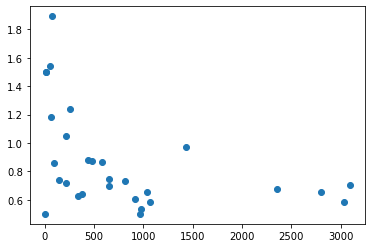

In [79]:
df = pp24
z = results('player_name').sort_values(by='woba')
x = z.pitches
y = z.ops
plt.scatter(x,y)

In [80]:
# Home Road splits of Phillies Pitching
ret = pd.DataFrame()
for gy in pps.game_year.unique().tolist():
    pp24 = pps[pps.game_year == gy]
    df = pp24[pp24.home_team=='PHI']
    h = hres = results('player_name')
    df = pp24[pp24.home_team!='PHI']
    a = ares = results('player_name')
    z = h.merge(a,on = 'player_name', suffixes = ('_h','_a'))
    z['diff'] = z.ops_h - z.ops_a
    z['game_year'] = gy
    m = z[['game_year','player_name','diff']].sort_values(by='diff',ascending=False)
    ret = pd.concat([ret,m])

In [81]:
j = pps.groupby(['game_year','player_name'],as_index=False).agg({'des' : 'count'})
k = ret.merge(j, on = ['game_year','player_name'])
k

,game_year,player_name,diff,des
0,2015,"Asher, Alec",0.492,501
1,2015,"Neris, Hector",0.223,681
2,2015,"Gómez, Jeanmar",0.113,1173
3,2015,"Giles, Ken",0.094,1185
4,2015,"Morgan, Adam",0.077,1246
...,...,...,...,...
253,2024,"Ruiz, José",-0.135,810
254,2024,"Alvarado, José",-0.138,1039
255,2024,"Sánchez, Cristopher",-0.267,2797
256,2024,"Phillips, Tyler",-0.299,578


In [82]:
k.agg({'diff' : ['mean','std','var']})

,diff
mean,-0.006194
std,0.368312
var,0.135654


(array([  4.,   9.,  19., 119.,  79.,  17.,   6.,   1.,   2.,   2.]),
 array([-1.233 , -0.9216, -0.6102, -0.2988,  0.0126,  0.324 ,  0.6354,
         0.9468,  1.2582,  1.5696,  1.881 ]),
 <BarContainer object of 10 artists>)

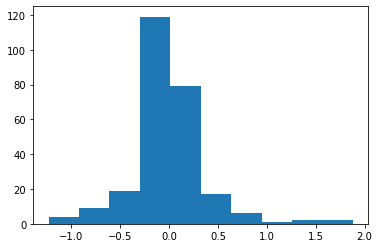

In [83]:
plt.hist(k['diff'].values)

In [84]:
## He is throwing way more ST and moving away from his FS, get me over CU to get ahead in th count, throwing up in the zone more, maybe not on purpose?

In [85]:
df = tw
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Walker, Taijuan",18174,4667,3291,1041,164,358,959,0.247,0.311,0.42,0.731,0.316


In [86]:
df = tw[tw.game_year.isin([2023,2024])]
bp = df[df.game_date > '2024-08-28']
first_pitch_bp = bp[bp.pitch_number == 1]
st = df[~df.game_date.isin(bp.game_date)]
first_pitch_st = st[st.pitch_number == 1]
pitch_mix(first_pitch_bp)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,18,91.388889,1949.388889,10.611111,27.3
0,CU,Curveball,13,74.838462,2453.692308,9.384615,19.7
5,ST,Sweeper,12,85.833333,2458.916667,8.166667,18.2
2,FF,4-Seam Fastball,11,91.381818,2041.454545,8.090909,16.7
1,FC,Cutter,6,88.383333,2373.333333,9.333333,9.1
3,FS,Split-Finger,6,86.683333,1391.333333,9.666667,9.1


In [87]:
pitch_mix(first_pitch_st)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,307,91.600977,1946.857143,8.195440,29.2
1,FC,Cutter,189,86.984127,2358.962567,8.772487,18.0
2,FF,4-Seam Fastball,187,92.133155,2083.686813,7.818182,17.8
3,FS,Split-Finger,176,87.484091,1405.241379,10.437500,16.7
0,CU,Curveball,135,74.105926,2387.170543,8.748148,12.8
5,ST,Sweeper,58,84.048276,2485.438596,8.655172,5.5


In [88]:
first_pitch_bp.groupby('type',as_index=False).agg({'des' : 'count'})

,type,des
0,B,26
1,S,26
2,X,14


In [89]:
20/35

0.5714285714285714

In [90]:
x = first_pitch_st.groupby('type',as_index=False).agg({'des' : 'count'})
(527+115)/x.des.sum()

0.6102661596958175

In [91]:
# Looks like his velo is up against the Mets, how does he do against them in general
gms = results('game_date')
max_game = gms[gms.game_date == gms.game_date.max()]

In [92]:
def indicators(df,level):
    x = df.groupby(level
              ,as_index=False).agg({'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'launch_speed' : 'mean'
                                    ,'launch_angle' : 'mean'
                                    ,'hit_distance_sc' : 'mean'
                                   })
    return x
level = ['pitch_type','game_date','game_pk']
ind = indicators(df,level)
max_ind = ind[ind.game_date.isin(max_game.game_date)]

max_ind.merge(max_game,on='game_date')

pm = pitch_mix(df[df.game_date.isin(max_ind.game_date)])

mu = pitch_mix(df[df.game_year==2024])

In [93]:
z = pm.merge(mu,on='pitch_type',suffixes = ('','_mu'))
z['diff'] = z.release_speed - z.release_speed_mu
z

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,pitch_name_mu,count_mu,release_speed_mu,release_spin_rate_mu,zone_mu,usage_mu,diff
0,FF,4-Seam Fastball,17,91.529412,2085.529412,7.411765,30.9,4-Seam Fastball,181,91.488398,2064.957576,8.486188,12.6,0.041014
1,FS,Split-Finger,16,87.068750,1366.875000,9.812500,29.1,Split-Finger,314,86.678662,1369.056856,10.070064,21.9,0.390088
2,CU,Curveball,8,75.137500,2480.625000,9.875000,14.5,Curveball,155,74.678710,2429.453901,9.296774,10.8,0.458790
3,ST,Sweeper,6,85.966667,2472.666667,9.000000,10.9,Sweeper,256,85.069141,2471.380165,9.625000,17.8,0.897526
4,SI,Sinker,5,91.880000,1950.600000,10.800000,9.1,Sinker,394,91.124365,1933.625995,8.378173,27.5,0.755635
5,FC,Cutter,3,87.566667,2324.666667,9.666667,5.5,Cutter,135,87.345926,2322.742424,9.007407,9.4,0.220741


<BarContainer object of 6 artists>

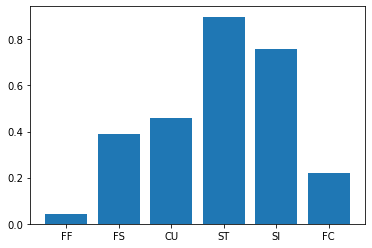

In [94]:
x = z['pitch_type'].values
y = z['diff'].values
plt.bar(x,y)

In [95]:
df = tw
hts = results('home_team')
hts['player_name'] = tw.player_name.iloc[0]
nym = hts[hts.home_team == 'NYM']
avg = results('player_name')
z = nym.merge(avg, on = 'player_name', suffixes = ('','_mu'))
z['diff'] = z.ops - z.ops_mu
z[['pitches','plate_apps', 'ops', 'ops_mu','diff','ba','obp','slg']]

,pitches,plate_apps,ops,ops_mu,diff,ba,obp,slg
0,2894,743,0.66,0.731,-0.071,0.218,0.289,0.37


In [96]:
z = hts.merge(avg, on = 'player_name', suffixes = ('','mu'))
z['diff'] = z.ops - z.opsmu
z[['home_team'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'ops'
                                                          ,'opsmu'
   ,'diff'
                                                          ,'ba'
                                                          ,'bamu'
                                                          ,'obp'
                                                          ,'obpmu'
                                                          ,'slg'
                                                          ,'slgmu'
                                                          ,'woba'
                                                          ,'wobamu'
                                                         ]].sort_values(by='diff')


,home_team,pitches,plate_apps,ops,opsmu,diff,ba,bamu,obp,obpmu,slg,slgmu,woba,wobamu
12,LAA,306,81,0.491,0.731,-0.240,0.205,0.247,0.222,0.311,0.269,0.42,0.215,0.316
25,STL,394,99,0.497,0.731,-0.234,0.176,0.247,0.222,0.311,0.275,0.42,0.218,0.316
8,CWS,284,77,0.515,0.731,-0.216,0.169,0.247,0.234,0.311,0.282,0.42,0.230,0.316
5,CIN,195,47,0.534,0.731,-0.197,0.186,0.247,0.255,0.311,0.279,0.42,0.243,0.316
16,MIN,197,56,0.572,0.731,-0.159,0.189,0.247,0.232,0.311,0.340,0.42,0.248,0.316
4,CHC,280,70,0.588,0.731,-0.143,0.203,0.247,0.300,0.311,0.288,0.42,0.266,0.316
6,CLE,202,50,0.606,0.731,-0.125,0.239,0.247,0.280,0.311,0.326,0.42,0.265,0.316
22,SD,566,145,0.650,0.731,-0.081,0.215,0.247,0.297,0.311,0.354,0.42,0.289,0.316
7,COL,550,153,0.656,0.731,-0.075,0.234,0.247,0.288,0.311,0.369,0.42,0.285,0.316
17,NYM,2894,743,0.660,0.731,-0.071,0.218,0.247,0.289,0.311,0.370,0.42,0.290,0.316


<BarContainer object of 30 artists>

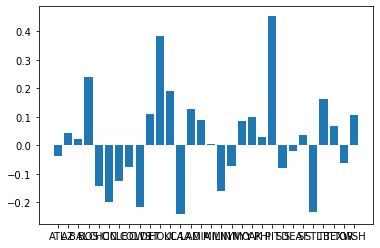

In [97]:
x = z.home_team.values
y = z['diff'].values
plt.bar(x,y)

# NYM (A) 919-922
## Game 1: Severino vs Walker
## Game 2: Peterson vs Sanchez
## Game 3: Manaea vs Suarez
## Game 4: Megill vs Wheeler

In [98]:
# Zack Wheeler talkinng about front hip sinkers, man.

In [99]:
# Zack Wheeler talking about routines

In [100]:
# Ranger is "doing his thing"

# The Secret Lives of Mormon Wives
Jessi is so right.
<br> Jen is judgemental. Jen controls and she is bought into it.
<br> He will 100% divorce her, that is despicable MR. AFfleck. Zac Affleck
<br> Taylor trying to support Jen Affleck.
<br> Amy and TIm went to Vegas once a year.

# CHC (H) 923-925
## Game 1: Killian vs Nola
## Game 2: Steele vs Walker
## Game 3: ? vs Sanchez

In [101]:
df = pp24[pp24.p_throws=='L']
l24 = lefties24 = results('player_name')

In [102]:
measure = 'mean'
inds = pp24.groupby(['player_name'
              ,'pitcher'
             ],as_index=False).agg({'game_pk' : 'nunique'
                                    ,'launch_speed' : measure
                                    ,'pitch_type' : 'nunique'
                                    ,'launch_angle' : measure
                                    ,'hit_distance_sc' : measure
                                    ,'release_speed' : measure
                                    ,'release_speed' : measure
                                   })
z = inds.merge(l24,left_on='player_name',right_on='player_name',suffixes = ('','_mu'))                                    

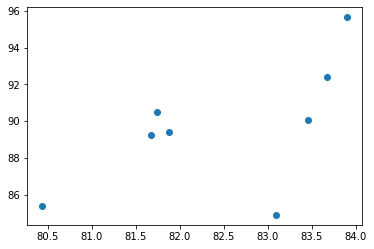

In [103]:
def scatter(x,y):
    plt.scatter(x,y)
    #plt.title('Scatterplot of' +x.columns.name + y.columns.name)
    plt.show()
    
scatter(z.launch_speed,z.release_speed)

# WAS (A) 927-929
## Game 1: Williams vs Suarez
## Game 2: Gore vs Wheeler
## Game 3: Irvin vs Nola

# Season Recap
Well, it doesn't get much better than that. The Phillies are the NL East Champions and have secured a spot in the NLDS. They will come close to the best record in baseball but likely finish second to the Dodgers. It does not matter now, it is all about getting John Middleton his fucking trophy back.

In [105]:
# Ah shit, that guy!
guy = 'Turner, Trea'

res[res.player_name == guy]

# Trea Turner had a .293 batting average according to me (as of 9/29 not including today) but a .295 at the end of the season
# Schwarber will certainly finish with the most pitches and plate apps
# Casty and Bohm tied with bip, think Casty will take
# Harper ends up with the hits
# Schwarber easily on homers, walks, and punchies?
# Turner will take it on ba
# Harper obp and ops
# Marchan surprise slg? Need to filter 

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
160,"Turner, Trea",4900,1281,934.0,333.0,49.0,75.0,254.0,0.28,0.328,0.466,0.794,0.342


(array([135.,  14.,   8.,   5.,   1.,   2.,   3.,   1.,   1.,   5.]),
 array([1.0000e+00, 3.1970e+02, 6.3840e+02, 9.5710e+02, 1.2758e+03,
        1.5945e+03, 1.9132e+03, 2.2319e+03, 2.5506e+03, 2.8693e+03,
        3.1880e+03]),
 <BarContainer object of 10 artists>)

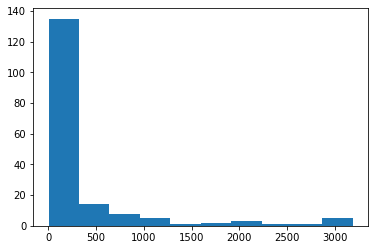

In [106]:
a = res[['player_name'
     ,'plate_apps'
     ,'pitches'
     ,'slg'
    ]].sort_values(by='slg',ascending=False)
a['pitch_share'] = a.pitches / a.pitches.sum()
a['pa_share'] = a.plate_apps / a.plate_apps.sum()
a.round(3)
# looks like ~100 plate_apps seems like a decent cutoff?
a.agg({'plate_apps' : ['mean'
                       ,'median'
                       ,'std'
                       ,'var'
                      ]
      })
plt.hist(a.plate_apps)

In [107]:
a.describe()

,plate_apps,pitches,slg,pitch_share,pa_share
count,175.000000,175.000000,172.000000,175.000000,175.000000
mean,332.685714,1300.040000,0.261186,0.005714,0.005714
std,663.393954,2623.137159,0.169762,0.011530,0.011395
min,1.000000,1.000000,0.000000,0.000004,0.000017
25%,8.500000,34.500000,0.108250,0.000152,0.000146
50%,63.000000,262.000000,0.312500,0.001152,0.001082
75%,243.000000,968.000000,0.397000,0.004255,0.004174
max,3188.000000,12994.000000,0.579000,0.057115,0.054758


In [108]:
b = a.describe()
b.plate_apps['25%']

8.5

In [112]:
# Hitting - Season Leaders
df = po24
res = results('player_name')
leaders = pd.DataFrame()
for c in res.columns:
    z = res.sort_values(by=c,ascending=False)
    z = z[z.plate_apps >= z.plate_apps.quantile(.25)]
    #print(z['player_name']
    #      ,c
    #      ,z[z[c] == z[c].max()][c][0]
    #     )
    t = z[z[c] == z[c].max()]
    print(c
          ,t.player_name.unique()[0]
          ,':'
          ,c
          ,'='
          ,t[c].unique()[0]
         )
    t['max'] = c
    leaders = pd.concat([leaders,t])

player_name Wilson, Weston : player_name = Wilson, Weston
pitches Schwarber, Kyle : pitches = 2822
plate_apps Schwarber, Kyle : plate_apps = 680
bip Bohm, Alec : bip = 467
hits Harper, Bryce : hits = 156.0
hrs Schwarber, Kyle : hrs = 38.0
walks Schwarber, Kyle : walks = 100.0
strikeouts Schwarber, Kyle : strikeouts = 195
ba Turner, Trea : ba = 0.293
obp Schwarber, Kyle : obp = 0.362
slg Harper, Bryce : slg = 0.527
ops Harper, Bryce : ops = 0.889
woba Harper, Bryce : woba = 0.381


In [113]:
leaders[['player_name'
         ,'max'
         ,'pitches'
         ,'plate_apps'
         ,'bip'
         ,'hits'
         ,'hrs'
         ,'walks'
         ,'strikeouts'
         ,'ba'
         ,'obp'
         ,'slg'
         ,'ops'
         ,'woba'
        ]]

,player_name,max,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
20,"Wilson, Weston",player_name,356,93,56,23.0,3.0,8.0,27,0.277,0.344,0.482,0.826,0.354
14,"Schwarber, Kyle",pitches,2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
14,"Schwarber, Kyle",plate_apps,2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
0,"Bohm, Alec",bip,2097,597,467,154.0,15.0,38.0,85,0.282,0.332,0.452,0.783,0.338
1,"Castellanos, Nick",bip,2322,654,467,153.0,23.0,38.0,136,0.253,0.307,0.427,0.734,0.319
5,"Harper, Bryce",hits,2443,616,414,156.0,30.0,65.0,135,0.286,0.362,0.527,0.889,0.381
14,"Schwarber, Kyle",hrs,2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
14,"Schwarber, Kyle",walks,2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
14,"Schwarber, Kyle",strikeouts,2822,680,379,141.0,38.0,100.0,195,0.249,0.362,0.489,0.850,0.367
19,"Turner, Trea",ba,2017,533,402,146.0,20.0,27.0,96,0.293,0.336,0.463,0.799,0.346


In [131]:
# rbis
ks = po24[po24.player_name == 'Schwarber, Kyle']
z = ks.groupby(['game_pk'
            ,'at_bat_number'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : ['min','max']
                 ,'post_away_score' : ['min','max']
                 #,'delta_home_win_exp' : 'abs'
                })
z['h_diff'] = z['post_home_score']['max'] - z['post_home_score']['min']
z['a_diff'] = z['post_away_score']['max'] - z['post_away_score']['min']
hz = z[(z.home_team == 'PHI')][['game_pk','at_bat_number','home_team','away_team','h_diff']].rename(columns = {'h_diff' : 'runs'})
az = z[z.away_team == 'PHI'][['game_pk','at_bat_number','home_team','away_team','a_diff']].rename(columns = {'a_diff' : 'runs'})
hz.runs.sum()+az.runs.sum() # I only counted 97 of the runs scored for him.

97

In [136]:
# What about doubles? That is easy to do
df = dbls = po24[po24.events == 'double']
results('player_name').sort_values(by='pitches',ascending=False)
df.groupby(['player_name'
           ,'batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'launch_speed_angle' : 'mean'
                 ,'hit_distance_sc' : 'sum'
                 ,'release_speed' : 'mean'
                }).round(3).sort_values(by='des',ascending=False)

,player_name,batter,des,launch_speed,launch_angle,launch_speed_angle,hit_distance_sc,release_speed
0,"Bohm, Alec",664761,44,98.595,14.909,4.364,10996.0,88.307
4,"Harper, Bryce",547180,42,95.426,17.214,4.452,10920.0,88.283
1,"Castellanos, Nick",592206,30,96.450,20.633,4.600,8761.0,88.600
18,"Turner, Trea",607208,25,95.608,14.880,4.200,5820.0,88.200
13,"Schwarber, Kyle",656941,22,105.718,16.773,5.182,6320.0,88.045
16,"Stott, Bryson",681082,19,95.984,10.842,3.842,3784.0,86.000
11,"Realmuto, J.T.",592663,18,99.900,14.611,4.667,4665.0,89.433
8,"Marsh, Brandon",669016,17,96.535,18.647,4.588,5024.0,91.371
14,"Sosa, Edmundo",624641,12,95.475,19.250,4.500,3481.0,88.942
12,"Rojas, Johan",679032,12,98.342,8.833,3.833,2538.0,88.900


In [114]:
# Nice, I filtered the Phillies leaders to only be for batters who were at or above the 25th percentile in plate appearances.

In [117]:
# Need to produce the pitcher ones.
starters = ['Wheeler, Zack'
            ,'Nola, Aaron'
            ,'Suarez, Ranger'
            ,'Sanchez, Cristopher'
            ,'Walker, Taijuan'
            ,'Turnbull, Spencer'
            ,'Allard, Kolby'
            ,'Phillips, Tyler'
            ,'Mercado, Michael'
           ]
df = pp24
results('player_name').sort_values(by='pitches',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
15,"Nola, Aaron",3093,799,554,180,29.0,50.0,189.0,0.242,0.292,0.415,0.706,0.306
27,"Wheeler, Zack",3037,765,493,136,19.0,50.0,213.0,0.193,0.254,0.329,0.582,0.257
24,"Sánchez, Cristopher",2797,755,557,182,11.0,44.0,153.0,0.257,0.299,0.358,0.657,0.288
23,"Suárez, Ranger",2354,626,434,140,14.0,40.0,145.0,0.243,0.296,0.378,0.673,0.294
26,"Walker, Taijuan",1435,382,283,107,24.0,37.0,58.0,0.316,0.385,0.587,0.972,0.412
10,"Kerkering, Orion",1069,253,155,49,2.0,16.0,73.0,0.215,0.289,0.294,0.582,0.264
1,"Alvarado, José",1039,254,164,49,6.0,27.0,62.0,0.218,0.303,0.351,0.654,0.291
8,"Hoffman, Jeff",975,258,152,44,5.0,15.0,87.0,0.185,0.240,0.294,0.534,0.237
21,"Strahm, Matt",963,231,140,36,4.0,10.0,76.0,0.169,0.221,0.282,0.502,0.222
25,"Turnbull, Spencer",916,221,139,37,6.0,20.0,57.0,0.189,0.281,0.327,0.607,0.273


In [138]:
df = pp24
results('player_name').sort_values(by='strikeouts',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
27,"Wheeler, Zack",3037,765,493,136,19.0,50.0,213.0,0.193,0.254,0.329,0.582,0.257
15,"Nola, Aaron",3093,799,554,180,29.0,50.0,189.0,0.242,0.292,0.415,0.706,0.306
24,"Sánchez, Cristopher",2797,755,557,182,11.0,44.0,153.0,0.257,0.299,0.358,0.657,0.288
23,"Suárez, Ranger",2354,626,434,140,14.0,40.0,145.0,0.243,0.296,0.378,0.673,0.294
8,"Hoffman, Jeff",975,258,152,44,5.0,15.0,87.0,0.185,0.240,0.294,0.534,0.237
21,"Strahm, Matt",963,231,140,36,4.0,10.0,76.0,0.169,0.221,0.282,0.502,0.222
10,"Kerkering, Orion",1069,253,155,49,2.0,16.0,73.0,0.215,0.289,0.294,0.582,0.264
1,"Alvarado, José",1039,254,164,49,6.0,27.0,62.0,0.218,0.303,0.351,0.654,0.291
26,"Walker, Taijuan",1435,382,283,107,24.0,37.0,58.0,0.316,0.385,0.587,0.972,0.412
25,"Turnbull, Spencer",916,221,139,37,6.0,20.0,57.0,0.189,0.281,0.327,0.607,0.273


In [142]:
# Statcast Top Whatever
# Hardest Hit - Kyle Schwarber thrown out at second stretching this RBI single into a double against the Dodgers in July.
po24.sort_values(by='launch_speed',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

player_name        Schwarber, Kyle
inning                           2
game_date               2024-07-09
events                      single
launch_speed                 115.6
launch_angle                   9.0
hit_distance_sc              165.0
Name: 214163, dtype: object

In [149]:
# Farthest Hit - Trea bomb off of Max Fried down in Atlanta in July.
po24.sort_values(by='hit_distance_sc',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                    ]].iloc[0]

player_name        Turner, Trea
inning                        6
game_date            2024-07-05
events                 home_run
launch_speed              108.4
launch_angle               29.0
hit_distance_sc           459.0
Name: 214538, dtype: object

In [151]:
# Fastest Pitch - Alvarado pitch from opening series against Atlanta
pp24.sort_values(by='release_speed',ascending=False)[['player_name'
                                                      ,'inning'
                                                      ,'game_date'
                                                      ,'pitch_type'
                                                      ,'release_speed'
                                                      ,'release_spin_rate'
                                                      ,'type'
                                                      ,'home_team'
                                                      ,'away_team'
                                                     ]].head(5)

,player_name,inning,game_date,pitch_type,release_speed,release_spin_rate,type,home_team,away_team
226229,"Alvarado, José",8,2024-03-29,SI,101.0,2205.0,S,PHI,ATL
226018,"Soto, Gregory",8,2024-03-30,SI,100.8,2201.0,S,PHI,ATL
226219,"Alvarado, José",8,2024-03-29,SI,100.5,2228.0,X,PHI,ATL
210468,"Alvarado, José",8,2024-08-03,SI,100.5,1954.0,S,SEA,PHI
224095,"Soto, Gregory",7,2024-04-13,SI,100.5,2220.0,S,PHI,PIT


In [156]:
# Biggest Change in Win Probability - Edmundo Sosa triple in the top of the 9th in Denver, Edmundomania!
po24['winprob'] = po24.delta_home_win_exp.abs()

In [157]:
po24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(5)

,player_name,inning,game_date,events,launch_speed,launch_angle,hit_distance_sc,winprob,delta_home_win_exp
217993,"Castellanos, Nick",9,2024-06-09,grounded_into_double_play,NaN,NaN,NaN,0.530,-0.530
219734,"Sosa, Edmundo",9,2024-05-25,triple,81.4,19.0,224.0,0.502,-0.502
220617,"Clemens, Kody",9,2024-05-18,home_run,106.6,23.0,413.0,0.489,0.489
207897,"Castellanos, Nick",7,2024-08-29,home_run,107.4,26.0,417.0,0.431,0.431
217428,"Bohm, Alec",11,2024-06-14,double,105.6,21.0,384.0,0.428,-0.428


In [162]:
# Biggest Change in Win Probability Pitching 
pp24['winprob'] = pp24.delta_home_win_exp.abs()
pp24.sort_values(by='winprob',ascending=False)[['player_name'
                                                    ,'inning'
                                                ,'balls'
                                                ,'strikes'
                                                ,'outs_when_up'
                                                ,'type'
                                                    ,'game_date'
                                                    ,'events'
                                                    ,'launch_speed'
                                                    ,'launch_angle'
                                                    ,'hit_distance_sc'
                                                        ,'winprob'
                                                ,'delta_home_win_exp'
                                                    ]].head(40)

,player_name,inning,balls,strikes,outs_when_up,type,game_date,events,launch_speed,launch_angle,hit_distance_sc,winprob,delta_home_win_exp
218800,"Alvarado, José",9,0,0,2,X,2024-05-24,home_run,102.1,29.0,427.0,0.489,0.489
210907,"Strahm, Matt",7,1,2,1,X,2024-07-30,home_run,98.0,31.0,362.0,0.434,-0.434
221894,"Marte, Yunior",6,0,0,1,X,2024-04-30,home_run,97.5,30.0,384.0,0.412,0.412
224789,"Hoffman, Jeff",9,1,2,2,X,2024-04-08,single,105.5,-6.0,19.0,0.403,0.403
209703,"Hoffman, Jeff",9,0,0,0,X,2024-08-09,home_run,105.9,32.0,416.0,0.366,0.366
216286,"Kerkering, Orion",10,0,1,2,B,2024-06-14,NaN,NaN,NaN,NaN,0.364,0.364
211705,"Strahm, Matt",7,2,1,2,X,2024-07-24,double,98.8,28.0,381.0,0.354,0.354
205596,"Estévez, Carlos",9,1,0,0,X,2024-09-09,home_run,106.7,28.0,414.0,0.342,-0.342
210401,"Estévez, Carlos",10,3,2,2,B,2024-08-03,walk,NaN,NaN,NaN,0.342,0.342
214742,"Strahm, Matt",7,1,1,2,X,2024-06-27,double,99.1,18.0,337.0,0.342,-0.342


In [174]:
# Highest Estimated BA on an out - Kinda Nick Castellanos but probably Rojas for his play on Teoscar in LA

In [173]:
pp24.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
nouts = ['single','double'
         ,'triple','home_run'
         ,'hit_by_pitch'
         ,'walk'
         ,'field_error'
         ,'catcher_interference'
        ]
pp24[~pp24.events.isin(nouts)].sort_values(by='estimated_ba_using_speedangle',ascending=False
                                   )[['player_name'
                                      ,'inning'
                                      ,'game_date'
                                      ,'events'
                                      ,'balls'
                                      ,'strikes'
                                      ,'outs_when_up'
                                     ,'hit_location'
                                      ,'estimated_ba_using_speedangle'
                                      ,'type'
                                      #,'description'
                                      #,'des'
                                     ]].head(5)

,player_name,inning,game_date,events,balls,strikes,outs_when_up,hit_location,estimated_ba_using_speedangle,type
212319,"Nola, Aaron",3,2024-07-19,sac_fly,1,1,1,9.0,0.957,X
209857,"Phillips, Tyler",4,2024-08-07,field_out,1,0,2,8.0,0.954,X
206864,"Ruiz, José",5,2024-08-30,field_out,0,2,2,8.0,0.937,X
220423,"Kerkering, Orion",5,2024-05-12,field_out,0,0,1,8.0,0.934,X
213157,"Alvarado, José",8,2024-07-10,field_out,3,2,0,8.0,0.934,X
